# CNN Fashion MNIST

In [0]:
!pip install -q tensorflow-gpu==2.0.0

In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(tf.__version__, tf.test.gpu_device_name())
device_lib.list_local_devices()

2.0.0 /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1238999377493819407, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12882835559801373344
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5887348275870908149
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15956161332
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16753827911121636728
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Load the data

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## Play with the data

In [5]:
print(dir(tf))

['AggregationMethod', 'Assert', 'CriticalSection', 'DType', 'DeviceSpec', 'GradientTape', 'Graph', 'IndexedSlices', 'IndexedSlicesSpec', 'Module', 'Operation', 'OptionalSpec', 'RaggedTensor', 'RaggedTensorSpec', 'RegisterGradient', 'SparseTensor', 'SparseTensorSpec', 'Tensor', 'TensorArray', 'TensorArraySpec', 'TensorShape', 'TensorSpec', 'TypeSpec', 'UnconnectedGradients', 'Variable', 'VariableAggregation', 'VariableSynchronization', '_LazyLoader', '__builtins__', '__cached__', '__compiler_version__', '__cxx11_abi_flag__', '__doc__', '__file__', '__git_version__', '__loader__', '__monolithic_build__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_absolute_import', '_api', '_division', '_forward_module', '_importlib', '_m', '_print_function', '_root_estimator', '_sys', '_top_level_modules', '_types', 'abs', 'acos', 'acosh', 'add', 'add_n', 'argmax', 'argmin', 'argsort', 'as_dtype', 'as_string', 'asin', 'asinh', 'assert_equal', 'assert_greater', 'assert_less', 'ass

In [6]:
print('Train data: ', x_train.shape, y_train.shape)
print('Test data: ', x_test.shape, y_test.shape)

Train data:  (60000, 28, 28) (60000,)
Test data:  (10000, 28, 28) (10000,)


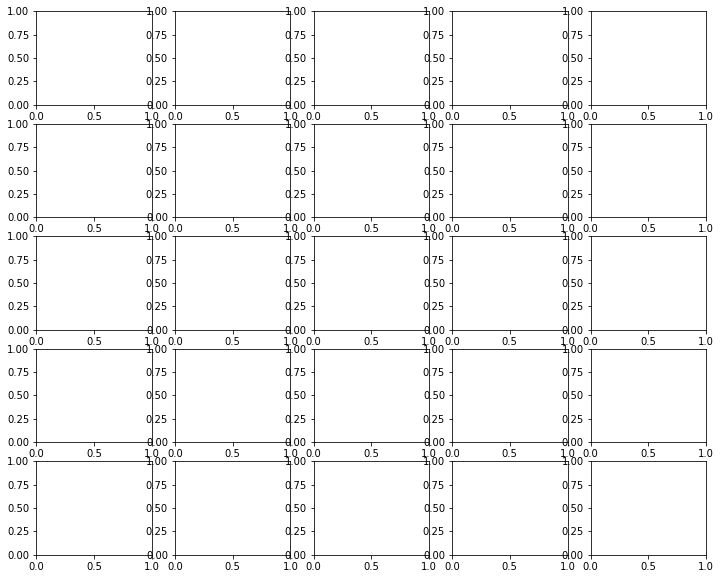

In [7]:
fig1, ax1 = plt.subplots(nrows=5, ncols=5, figsize=(12, 10));

In [0]:
for i in range(5):
		for j in range(5):
			ax1[i, j].axis('off')
			ax1[i, j].grid(False)
			ax1[i, j].set_xticks([])
			ax1[i, j].set_yticks([])

In [0]:
index = 0
for i in range(5):
    for j in range(5):

        ax1[i, j].imshow(x_train[index])
        ax1[i, j].set_title(r''.format(y_train[index]), fontsize=8)
        index += 1

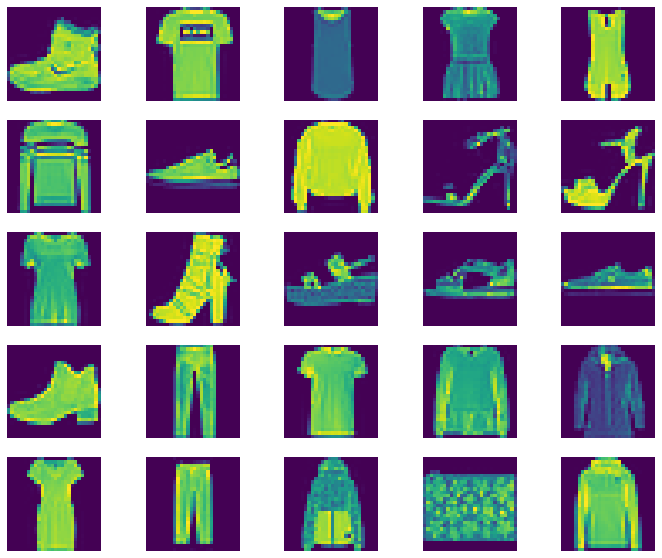

In [10]:
fig1

## Prepate the data

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [13]:
print('Train data: ', x_train.shape, y_train.shape)
print('Test data: ', x_test.shape, y_test.shape)

Train data:  (60000, 28, 28, 1) (60000,)
Test data:  (10000, 28, 28, 1) (10000,)


## Build the model

In [0]:
model = tf.keras.models.Sequential()
model0 = tf.keras.models.Sequential()

In [0]:
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=x_train[0].shape, padding='same', strides=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=x_train[0].shape, padding='same'))
model.add(tf.keras.layers.MaxPool2D(padding='valid'))

# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', strides=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(padding='valid'))

# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', strides=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(padding='valid'))

model.add( tf.keras.layers.Flatten())
model.add( tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add( tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
help(tf.keras.layers.MaxPool2D)

Help on class MaxPooling2D in module tensorflow.python.keras.layers.pooling:

class MaxPooling2D(Pooling2D)
 |  Max pooling operation for spatial data.
 |  
 |  Arguments:
 |    pool_size: integer or tuple of 2 integers,
 |      factors by which to downscale (vertical, horizontal).
 |      `(2, 2)` will halve the input in both spatial dimension.
 |      If only one integer is specified, the same window length
 |      will be used for both dimensions.
 |    strides: Integer, tuple of 2 integers, or None.
 |      Strides values.
 |      If None, it will default to `pool_size`.
 |    padding: One of `"valid"` or `"same"` (case-insensitive).
 |    data_format: A string,
 |      one of `channels_last` (default) or `channels_first`.
 |      The ordering of the dimensions in the inputs.
 |      `channels_last` corresponds to inputs with shape
 |      `(batch, height, width, channels)` while `channels_first`
 |      corresponds to inputs with shape
 |      `(batch, channels, height, width)`.
 

In [0]:
model0.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=x_train[0].shape) )
model0.add(tf.keras.layers.MaxPool2D())
model0.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model0.add(tf.keras.layers.MaxPool2D())
model0.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model0.add(tf.keras.layers.MaxPool2D())

model0.add( tf.keras.layers.Flatten())
model0.add( tf.keras.layers.Dropout(0.2))
model0.add(tf.keras.layers.Dense(512, activation='relu'))
model0.add( tf.keras.layers.Dropout(0.2))
model0.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [20]:
model0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [21]:
help(model.compile)

Help on method compile in module tensorflow.python.keras.engine.training:

compile(optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, distribute=None, **kwargs) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    Arguments:
        optimizer: String (name of optimizer) or optimizer instance.
            See `tf.keras.optimizers`.
        loss: String (name of objective function), objective function or
            `tf.losses.Loss` instance. See `tf.losses`. If the model has
            multiple outputs, you can use a different loss on each output by
            passing a dictionary or a list of losses. The loss value that will
            be minimized by the model will then be the sum of all individual
            losses.
        metrics: List of metrics to be evaluated by the model during training
            and testing. Typically you w

## Train the model

In [0]:
import random
import os

my_seed = 1234
np.random.seed(my_seed)
os.environ["PYTHONSEED"] = str(my_seed)
os.environ['PYTHONHASHSEED']=str(my_seed)
random.seed(my_seed)

In [23]:
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 152us/sample - loss: 0.4451 - accuracy: 0.8371 - val_loss: 0.3345 - val_accuracy: 0.8754
Epoch 2/15
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2864 - accuracy: 0.8931 - val_loss: 0.2705 - val_accuracy: 0.9012
Epoch 3/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2422 - accuracy: 0.9106 - val_loss: 0.2585 - val_accuracy: 0.9055
Epoch 4/15
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2142 - accuracy: 0.9205 - val_loss: 0.2457 - val_accuracy: 0.9120
Epoch 5/15
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1913 - accuracy: 0.9290 - val_loss: 0.2235 - val_accuracy: 0.9169
Epoch 6/15
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1752 - accuracy: 0.9343 - val_loss: 0.2352 - val_accuracy: 0.9135
Epoch 7/15
60000/60000 [==========================

In [24]:
help(model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
         

## Evaluate the model

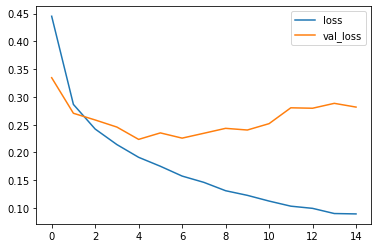

In [25]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

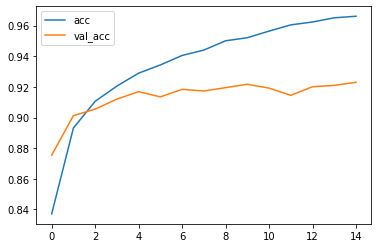

In [26]:
plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()

## Make predictions

In [0]:
y_test_hat = model.predict(x_test).argmax(axis=1)

In [0]:
cm = confusion_matrix(y_test, y_test_hat)

In [29]:
cm

array([[904,   0,  21,   7,   4,   2,  55,   0,   7,   0],
       [  0, 988,   0,   7,   2,   0,   1,   0,   2,   0],
       [ 20,   0, 908,   8,  27,   0,  36,   0,   1,   0],
       [ 20,   3,   9, 927,  22,   0,  17,   0,   1,   1],
       [  0,   1,  54,  24, 861,   0,  58,   0,   2,   0],
       [  0,   0,   0,   0,   0, 981,   0,  13,   1,   5],
       [135,   2,  59,  20,  45,   0, 731,   0,   8,   0],
       [  0,   0,   0,   0,   0,   1,   0, 990,   0,   9],
       [  2,   0,   1,   2,   1,   2,   0,   0, 991,   1],
       [  0,   0,   1,   0,   0,   6,   0,  44,   0, 949]])

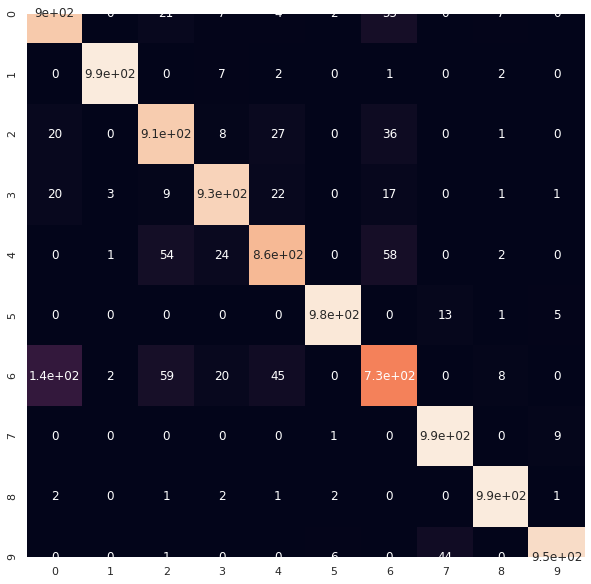

In [30]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(cm,annot=True,cbar=False)

In [31]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('\n'.join(['{}: {}'.format(i, classes[i]) for i in range(len(classes))]) )

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot
